In [1]:
# ATTENTION: Please do not alter any of the provided code in the exercise. Only add your own code where indicated
# ATTENTION: Please do not add or remove any cells in the exercise. The grader will check specific cells based on the cell position.
# ATTENTION: Please use the provided epoch values when training.

import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from os import getcwd

In [2]:
def get_data(filename):
    with open(filename) as training_file:
        reader = csv.reader(training_file, delimiter=',')    
        imgs = []
        labels = []

        next(reader, None)
        
        for row in reader:
            label = row[0]
            data = row[1:]
            img = np.array(data).reshape((28, 28))

            imgs.append(img)
            labels.append(label)

        images = np.array(imgs).astype(float)
        labels = np.array(labels).astype(float)
            
    return images, labels

path_sign_mnist_train = f"{getcwd()}/../tmp2/sign_mnist_train.csv"
path_sign_mnist_test = f"{getcwd()}/../tmp2/sign_mnist_test.csv"
training_images, training_labels = get_data(path_sign_mnist_train)
testing_images, testing_labels = get_data(path_sign_mnist_test)

# Keep these
print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

# Their output should be:
# (27455, 28, 28)
# (27455,)
# (7172, 28, 28)
# (7172,)

(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [3]:
# In this section you will have to add another dimension to the data
# So, for example, if your array is (10000, 28, 28)
# You will need to make it (10000, 28, 28, 1)
# Hint: np.expand_dims

training_images = np.expand_dims(training_images, axis=3)
testing_images = np.expand_dims(testing_images, axis=3)


# Create an ImageDataGenerator and do Image Augmentation
train_datagen = ImageDataGenerator(
    # Your Code Here
    rescale=1. / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
    )

validation_datagen = ImageDataGenerator(
    # Your Code Here
     rescale=1 / 255
)
    
# Keep These
print(training_images.shape)
print(testing_images.shape)
    
# Their output should be:
# (27455, 28, 28, 1)
# (7172, 28, 28, 1)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [4]:
# Define the model
# Use no more than 2 Conv2D and 2 MaxPooling2D
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(26, activation='softmax')
])

# Compile Model. 
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Configure generators
train_gen = train_datagen.flow(
    training_images,
    training_labels,
    batch_size=64
)

val_gen = validation_datagen.flow(
    testing_images,
    testing_labels,
    batch_size=64
)

# Train the Model
history = model.fit_generator(
    train_gen,
    epochs=15,
    validation_data=val_gen
)

model.evaluate(testing_images, testing_labels)
    
# Baseline
# [Loss, accuracy]
[6.92426086682151, 0.56609035]

Epoch 1/15
429/429 [==============================] - 47s 109ms/step - loss: 2.7439 - accuracy: 0.1702 - val_loss: 2.0959 - val_accuracy: 0.3111
Epoch 2/15
429/429 [==============================] - 42s 97ms/step - loss: 2.0941 - accuracy: 0.3426 - val_loss: 1.6915 - val_accuracy: 0.3986
Epoch 3/15
429/429 [==============================] - 41s 95ms/step - loss: 1.7459 - accuracy: 0.4406 - val_loss: 1.2956 - val_accuracy: 0.5484
Epoch 4/15
429/429 [==============================] - 43s 100ms/step - loss: 1.4948 - accuracy: 0.5142 - val_loss: 0.9864 - val_accuracy: 0.6509
Epoch 5/15
429/429 [==============================] - 41s 96ms/step - loss: 1.3031 - accuracy: 0.5748 - val_loss: 0.8363 - val_accuracy: 0.7165
Epoch 6/15
429/429 [==============================] - 44s 102ms/step - loss: 1.1611 - accuracy: 0.6191 - val_loss: 0.7297 - val_accuracy: 0.7361
Epoch 7/15
429/429 [==============================] - 41s 96ms/step - loss: 1.0362 - accuracy: 0.6591 - val_loss: 0.6100 - val_accura

[6.92426086682151, 0.56609035]

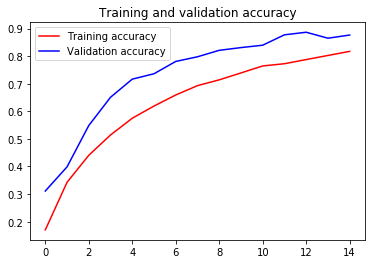

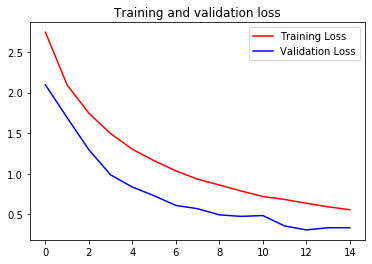

In [7]:
# Plot the chart for accuracy and loss on both training and validation
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Submission Instructions

In [ ]:
# Now click the 'Submit Assignment' button above.

# When you're done or would like to take a break, please run the two cells below to save your work and close the Notebook. This will free up resources for your fellow learners. 

In [ ]:
%%javascript
<!-- Save the notebook -->
IPython.notebook.save_checkpoint();

In [ ]:
%%javascript
IPython.notebook.session.delete();
window.onbeforeunload = null
setTimeout(function() { window.close(); }, 1000);